# PORTADA

TRABAJO FINAL DE CONTROL FUZZY


Realizado por:  


Duvan Gilberto Rivera Torres,   

Alejandro corrales beldad

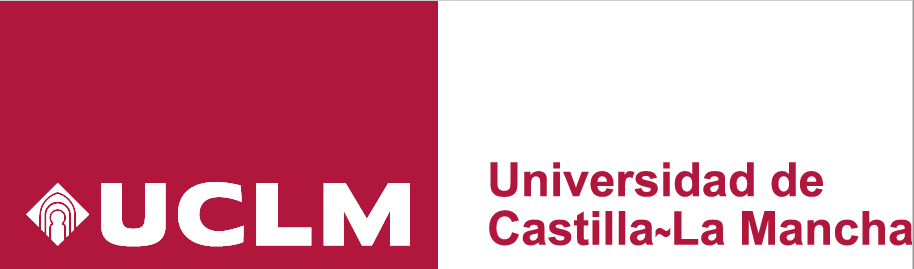




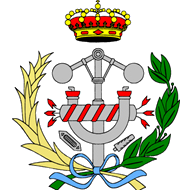

# 1.FRIGORIFICO

Nuestro problema fuzzy busca controlar el **consumo** electrico de un frigorifico en base a la **temperatura** y **humedad** exterior. De esta forma si el frigorifico esta trabajando en verano tendra un **consumo** de energia electrica mayor del que tendra en invierno. Nuestro controlador será capaz de distinguir las condiciones ambientales y en base a ello hacer un **consumo** mas eficiente de la energia.


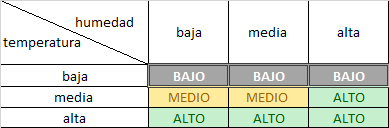

# 2.MODELO PROPUESTO

Sus reglas son:

IF Temperatura es Baja THEN Consumo es Bajo

IF Temperatura es Media AND Humedad es Baja THEN Consumo es Medio

IF Temperatura es Media AND Humedad es Media THEN Consumo es Medio

IF Temperatura es Media AND Humedad es Alta THEN Consumo es Alto

IF Temperatura es Alta THEN Consumo es Alto


IMPORTAR LIBRERIAS

In [1]:
import matplotlib.pyplot as plt 
import numpy as np

# 3.VARIABLES LINGUISTICAS

Vamos a representar nuestras variables en forma de diccionario con las siguientes tres componentes:

1.   Dominio (tupla con dos valores).
2.   Conjuntos difusos (diccionario con tuplas de 4 elementos, los trapeziodes/triángulos).
3.   Nombre, es un string.






In [2]:
# Variable temperatura

# Suponemos las temperatura interiores de la casa más extremas que pueden dar.

Temperatura = {
    'dominio':(0, 60), # dominio
    'conjuntos':{'Baja': (0,0,5,15), # Conjuntos difuso
    'Media': (10,20,30,45),
    'Alta': (35,50,60,60)},
    'nombre': 'Temperatura'
}
at_prima = [11,16,16,18] # Se pone una a' de la temperatura aleatoria
                         # por seguridad y para realizar pruebas

In [3]:
# Variable humedad

# Medimos la humedad de forma porcentual.

Humedad = {
    'dominio':(0, 100), # dominio
    'conjuntos':{'Baja': (0,0,10,35), # Conjuntos difuso
    'Media': (30,40,50,65),
    'Alta': (60,80,100,100)},
    'nombre': 'Humedad'
}
ah_prima = [33,35,35,38] # Se pone una a' de la humedad aleatoria
                         # por seguridad y para realizar pruebas

In [4]:
# Variable consumo

# Medimos el consumo de forma porcentual.

Consumo = {
    'dominio':(0, 100), # dominio
    'conjuntos':{'Bajo': (0,0,15,25), # Conjuntos difuso
    'Medio': (20,35,40,60),
    'Alto': (50,75,100,100)},
    'nombre': 'Consumo'
}

Creamos una función que recoje los valores de las entradas, que se pedirán al usuario de dos en dos (el primer punto para la a' tanto de la temperatura como de la humedad)

In [6]:
def entradas(j1,j2): 
  # j1 y j2 son los valores límites de la temperatura y la humedad.
  ah_p= [0,0,0,0]
  at_p= [0,0,0,0]
  ax= [0,0,0,0] # Vector auxiliar para comprobar si el 
                # valor introducido es válido 
  for i in range(0,4):  # De 0 a 3, pues solo hay cuatro valores para las a'
    while (ax[i]== 0):
      at_p[i] = int( input( "Introduce valor {} de la entrada de temperatura: ". format(i) ) )
      ah_p[i] = int( input( "Introduce valor {} de la entrada de humeded: ". format(i) ) )
      # Si los numeros introducidos son menores que 0, mayores que su límite
      # o si son menores que los valores anteriores para cada uno, indica que
      # el número introducido es incorrecto y vuelve a repetir el ciclo, sin 
      # avanzar en el bucle for y por tanto, pidiendo el mismo valor.  
      if  ( at_p[i]<0 or at_p[i]>j1 ) or (i>0 and at_p[i]<at_p[i-1] ):
        print ("Numero de temperatura no válido")
      elif ( ah_p[i]<0 or ah_p[i]>j2 ) or (i>0 and ah_p[i]<ah_p[i-1] ):
        print ("Numero de humedad no válido")
      else:
        ax[i]= 1
  return at_p, ah_p

at_prima, ah_prima= entradas(60,100)
print(at_prima, ah_prima)

Introduce valor 0 de la entrada de temperatura: 5
Introduce valor 0 de la entrada de humeded: 5
Introduce valor 1 de la entrada de temperatura: 10
Introduce valor 1 de la entrada de humeded: 5
Introduce valor 2 de la entrada de temperatura: 20
Introduce valor 2 de la entrada de humeded: 10
Introduce valor 3 de la entrada de temperatura: 25
Introduce valor 3 de la entrada de humeded: 10
[5, 10, 20, 25] [5, 5, 10, 10]


# 4.FUNCIONES NECESARIAS Y DE PERTENENCIA

Generamos una función para generar conjuntos trapezoidales como se ha realizado en clase.

In [7]:
## Utilizaremos solo la funcion trapezoidal ya que la triangular es un caso 
## especial donde los dos parametros A[1] y A[2] se repiten para no tener meseta
## y haciendo que nuestro trapezoide sea un triangulo
 
def mu_trap(x, A=(0,0,2,4) ):
  if x<A[0]:
    return 0.0
  if x>=A[0] and x<A[1]:
    return (x-A[0])/(A[1]-A[0])
  if x>=A[1] and x<=A[2]:
    return 1
  if x>A[2] and x<A[3]:
    return (A[3]-x)/(A[3]-A[2])
  if x>=A[3]:
    return 0

### CODIGO PARA LA PERTENENCIA

Creamos los operadores de Mandani, tanto para un antecedente como para dos. Ambos teniendo en cuenta el consecuente.

In [8]:
# operador de implicación de Mandani: A->B se resuelve con A y B
def mu_R(x, A, y, B):
  return min( mu_trap(x,A),mu_trap(y,B) )

In [9]:
# operador de implicación de Mandani: A->B se resuelve con A y B
def mu_R2(x, A, y, B, z, C):
  return min( mu_trap(x,A),mu_trap(y,B),mu_trap(z,C) )

### CODIGO DE T-NORMA PARA LA RCI

De la misma forma, creamos el código para la T-norma usada, siguendo las mismas variaciones que en el caso anterior.

In [10]:
# T-norma necesaria para la Regla Composicional de Inferencia
def T(a,b):
  return min(a,b)

In [11]:
# T-norma necesaria para la Regla Composicional de Inferencia
def T2(a,b,c):
  return min(a,b,c)

# 5.DEFINICION FUNCIONES PARA ACCESO

Definimos funciones para acceder a las distintas partes de los diccionarios creados al inicio del programa. Luego comprobamos con unas llamadas a las mismas su correcto funcionamiento.

In [12]:
def nombreVL(VL):
  return VL['nombre']

def dominioVL(VL):
  return VL['dominio']

def conjuntosVL(VL):
  return VL['conjuntos']

def conjuntoVL(VL, cto):
  return VL['conjuntos'][cto]


print( nombreVL(Temperatura) )
print( dominioVL(Temperatura) )
print( conjuntosVL(Temperatura) )
print( conjuntoVL(Temperatura, 'Media') )

Temperatura
(0, 60)
{'Baja': (0, 0, 5, 15), 'Media': (10, 20, 30, 45), 'Alta': (35, 50, 60, 60)}
(10, 20, 30, 45)


# 6.PROPOSICIONES DIFUSAS

Generamos las proposiciones difusas a partir de las reglas establecidas para el modelo propuesto anteriormente.

In [13]:
Temp_es_baja = { # Representa la PDA "Temperatura es baja"
    'VL': Temperatura,
    'cto': 'Baja'
}

Temp_es_media = { # Representa la PDA "Temperatura es media"
    'VL': Temperatura,
    'cto': 'Media'
}

Temp_es_alta = { # Representa la PDA "Temperatura es alta"
    'VL': Temperatura,
    'cto': 'Alta'
}

Hum_es_baja = { # Representa la PDA "Humedad es baja"
    'VL': Humedad,
    'cto': 'Baja'
}

Hum_es_media = { # Representa la PDA "Humedad es media"
    'VL': Humedad,
    'cto': 'Media'
}

Hum_es_alta = { # Representa la PDA "Humedad es alta"
    'VL': Humedad,
    'cto': 'Alta'
}

Con_es_bajo = { # Representa la PDA "consumo es bajo"
    'VL': Consumo,
    'cto': 'Bajo'
}

Con_es_medio = { # Representa la PDA "consumo es medio"
    'VL': Consumo,
    'cto': 'Medio'
}

Con_es_alto = { # Representa la PDA "consumo es alto"
    'VL': Consumo,
    'cto': 'Alto'
}

Temp_es_media_y_Hum_es_baja = { # Representa la PDC "Temperatura es media y Humedad es baja"
    'prop': (Temp_es_media, Hum_es_baja), # PDAs que la componen
    'conec': ('AND'), # Conectores que unen los PDAs
}

Temp_es_media_y_Hum_es_media = { # Representa la PDC "Temperatura es media y Humedad es media"
    'prop': (Temp_es_media, Hum_es_media), # PDAs que la componen
    'conec': ('AND'), # Conectores que unen los PDAs
}

Temp_es_media_y_Hum_es_alta = { # Representa la PDC "Temperatura es media y Humedad es alta"
    'prop': (Temp_es_media, Hum_es_alta), # PDAs que la componen
    'conec': ('AND'), # Conectores que unen los PDAs
}

Y nuevamente, mostramos por pantalla las llamadas a las mismas para comprobar su funcionamiento.

In [14]:
# ACCESOS
print('Acceso a PDA en posición 1:', Temp_es_media_y_Hum_es_baja['prop'][0])
print('Acceso a PDA en posición 1:', Temp_es_media_y_Hum_es_baja['prop'][1])
print('Acceso a conjunto de proposición 0:', Temp_es_media_y_Hum_es_baja['prop'][0]['cto'])
print('Acceso a PDA en posición 1:', Hum_es_alta['VL']['conjuntos'][Hum_es_alta['cto']]) 

Acceso a PDA en posición 1: {'VL': {'dominio': (0, 60), 'conjuntos': {'Baja': (0, 0, 5, 15), 'Media': (10, 20, 30, 45), 'Alta': (35, 50, 60, 60)}, 'nombre': 'Temperatura'}, 'cto': 'Media'}
Acceso a PDA en posición 1: {'VL': {'dominio': (0, 100), 'conjuntos': {'Baja': (0, 0, 10, 35), 'Media': (30, 40, 50, 65), 'Alta': (60, 80, 100, 100)}, 'nombre': 'Humedad'}, 'cto': 'Baja'}
Acceso a conjunto de proposición 0: Media
Acceso a PDA en posición 1: (60, 80, 100, 100)


# 7.REGLAS DIFUSAS

Programamos los antedecentes y consecuentes de cada regla establecida, asociándola a una variable RDX' (Regla Difusa número X)

IF Temperatura es Baja THEN Consumo es Bajo

In [15]:
RD_1 = {
    'ant': Temp_es_baja, # Proposición difusa del antecedente
    'cons': Con_es_bajo # Proposición difusa del consecuente
}

IF Temperatura es Media AND Humedad es Baja THEN Consumo es Medio


In [16]:
RD_2 = {
    'ant': Temp_es_media_y_Hum_es_baja, # Proposición difusa del antecedente
    'cons': Con_es_medio # Proposición difusa del consecuente
}

IF Temperatura es Media AND Humedad es Media THEN Consumo es Medio

In [17]:
RD_3 = {
    'ant': Temp_es_media_y_Hum_es_media, # Proposición difusa del antecedente
    'cons': Con_es_medio # Proposición difusa del consecuente
}

IF Temperatura es Media AND Humedad es Alta THEN Consumo es Alto

In [18]:
RD_4 = {
    'ant': Temp_es_media_y_Hum_es_alta, # Proposición difusa del antecedente
    'cons': Con_es_alto # Proposición difusa del consecuente
}

IF Temperatura es Alta THEN Consumo es Alto

In [19]:
RD_5 = {
    'ant': Temp_es_alta, # Proposición difusa del antecedente
    'cons': Con_es_alto # Proposición difusa del consecuente
}

Antes de seguir debemos aseguranros que las reglas y llamadas fucionan como es debido. Por ello realizamos varias pruebas buscando realizar todas las posibilidades. 

In [20]:
# ACCESOS
print( 'Acceso al consecuente', RD_1['cons'] )
print( 'Acceso al antecedente', RD_1['ant'] )

Acceso al consecuente {'VL': {'dominio': (0, 100), 'conjuntos': {'Bajo': (0, 0, 15, 25), 'Medio': (20, 35, 40, 60), 'Alto': (50, 75, 100, 100)}, 'nombre': 'Consumo'}, 'cto': 'Bajo'}
Acceso al antecedente {'VL': {'dominio': (0, 60), 'conjuntos': {'Baja': (0, 0, 5, 15), 'Media': (10, 20, 30, 45), 'Alta': (35, 50, 60, 60)}, 'nombre': 'Temperatura'}, 'cto': 'Baja'}


In [21]:
print( 'Acceso al consecuente', RD_1['cons']['VL']['conjuntos'] [RD_1['cons']['cto']] )

Acceso al consecuente (0, 0, 15, 25)


In [22]:
print( 'Acceso al antecedente Temperatura Baja', RD_1['ant']['VL']['conjuntos'] [RD_1['ant']['cto']] )
print( 'Acceso al antecedente Temperatura Media', RD_3['ant']['prop'][0]['VL']['conjuntos'] [RD_3['ant']['prop'][0]['cto']] )
print( 'Acceso al antecedente Temperatura Alta', RD_5['ant']['VL']['conjuntos'] [RD_5['ant']['cto']] )
print( '---' )
print( 'Acceso al antecedente Humedad Baja', RD_2['ant']['prop'][1]['VL']['conjuntos'] [RD_2['ant']['prop'][1]['cto']] )
print( 'Acceso al antecedente Humedad Media', RD_3['ant']['prop'][1]['VL']['conjuntos'] [RD_3['ant']['prop'][1]['cto']] )
print( 'Acceso al antecedente  Humedad Alta', RD_4['ant']['prop'][1]['VL']['conjuntos'] [RD_4['ant']['prop'][1]['cto']] )
print( '---' )
print( 'Acceso al consecuente Consumo Bajo', RD_1['cons']['VL']['conjuntos'] [RD_1['cons']['cto']] )
print( 'Acceso al consecuente Consumo Medio', RD_2['cons']['VL']['conjuntos'] [RD_2['cons']['cto']] )
print( 'Acceso al consecuente Consumo Alto', RD_5['cons']['VL']['conjuntos'] [RD_5['cons']['cto']] )

Acceso al antecedente Temperatura Baja (0, 0, 5, 15)
Acceso al antecedente Temperatura Media (10, 20, 30, 45)
Acceso al antecedente Temperatura Alta (35, 50, 60, 60)
---
Acceso al antecedente Humedad Baja (0, 0, 10, 35)
Acceso al antecedente Humedad Media (30, 40, 50, 65)
Acceso al antecedente  Humedad Alta (60, 80, 100, 100)
---
Acceso al consecuente Consumo Bajo (0, 0, 15, 25)
Acceso al consecuente Consumo Medio (20, 35, 40, 60)
Acceso al consecuente Consumo Alto (50, 75, 100, 100)


### Simplificación de acceso desde Reglas Difusas

Ahora que hemos comprobado que las llamadas funcionan correctamente, simplificamos la referencia a las mismas para mayor facilidad de lectura tanto para los que crean como para los que lean y luego usen el código, por ello las simplificaciones deben ser nombres intuitivos.

In [23]:
t_baja= RD_1['ant']['VL']['conjuntos'] [RD_1['ant']['cto']]
t_media= RD_3['ant']['prop'][0]['VL']['conjuntos'] [RD_3['ant']['prop'][0]['cto']]
t_alta= RD_5['ant']['VL']['conjuntos'] [RD_5['ant']['cto']]

h_baja= RD_2['ant']['prop'][1]['VL']['conjuntos'] [RD_2['ant']['prop'][1]['cto']]
h_media= RD_3['ant']['prop'][1]['VL']['conjuntos'] [RD_3['ant']['prop'][1]['cto']]
h_alta= RD_4['ant']['prop'][1]['VL']['conjuntos'] [RD_4['ant']['prop'][1]['cto']]

c_baja= RD_1['cons']['VL']['conjuntos'] [RD_1['cons']['cto']]
c_media= RD_2['cons']['VL']['conjuntos'] [RD_2['cons']['cto']]
c_alta= RD_5['cons']['VL']['conjuntos'] [RD_5['cons']['cto']]

# 8.REPRESENTACION DE ENTRADAS

### CODIGO FUNCION REPRESENTACION DE CONJUNTOS Y LAS A'

Definimos una función que a partir de los datos introducidos, nos muestre en una gráfica los conjuntos de antecedentes y consecuentes.

In [24]:
# Los parámetros son:
# inic y fin: indican el dominio de la variable.
# inc: el incremento para los cálculos en el eje X
# conjuntos: los conjuntos difusos a dibujar con el formato:
# ((0,0,10,20),(10,20,20,30),(20,30,40,40)), 
# trapezoidales e indicados mediante una tupla de tuplas de 4 elementos
# nombres: lista con los nombres para la leyenda
# titulo: titulo del Gráfico
def dibuja_conjuntos(dominio, conjuntos, nombres, titulo):
  x = np.arange(dominio[0], dominio[1], dominio[2])
  l = []
  for conj in conjuntos:
    y = [mu_trap(e,conj) for e in x]
    b, = plt.plot(x,y)
    l.append(b)
  plt.legend(l, nombres, loc='best')
  y = [0 for e in x]
  plt.plot(x,y,'k')
  plt.title(titulo, 
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'size': 20})
  # Muestra la gráfica
  plt.show()
  plt.savefig(titulo+'.svg')

CONJUNTO DE TEMPERATURA

Ahora invocamos a la función que acabamos de crear y mostramos los conjuntos ya mencionados.

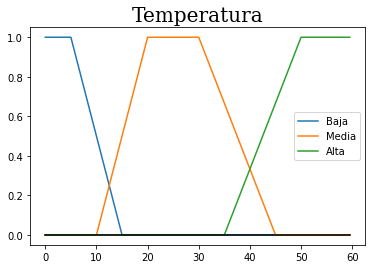

<Figure size 432x288 with 0 Axes>

In [25]:
# Invocación para realizar el dibujo del antecedente "Temperatura"
dibuja_conjuntos( (0,60,0.5), (t_baja,t_media,t_alta), ['Baja', 'Media', 'Alta'], 'Temperatura')

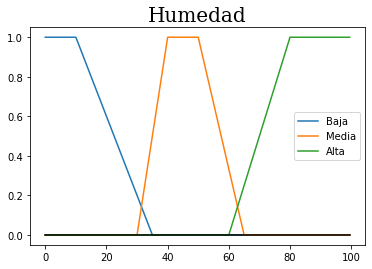

<Figure size 432x288 with 0 Axes>

In [26]:
# Invocación para realizar el dibujo del antecedente "Humedad"
dibuja_conjuntos( (0,100,0.5), (h_baja,h_media,h_alta), ['Baja', 'Media', 'Alta'], 'Humedad')

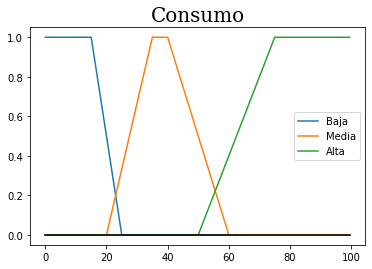

<Figure size 432x288 with 0 Axes>

In [27]:
# Invocación para realizar el dibujo del consecuente "Consumo"
dibuja_conjuntos( (0,100,0.5), (c_baja,c_media,c_alta), ['Baja', 'Media', 'Alta'], 'Consumo')

Realizamos el mismo proceso para mostrar las dos a' de los antedecentes.

In [28]:
def dibuja_aprima(dominio, aprima, nombres):
  x = np.arange(dominio[0], dominio[1], dominio[2])
  y = [mu_trap(e,aprima) for e in x]
  ambiente, = plt.plot(x,y)
  plt.yticks(np.arange(0,1.1,0.1))
  plt.legend([ambiente], [nombres], loc='best')
  # Muestra la gráfica
  plt.show()

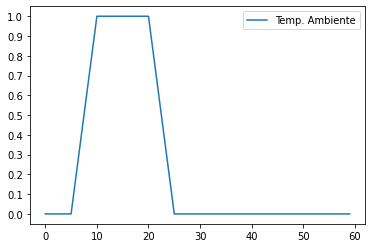

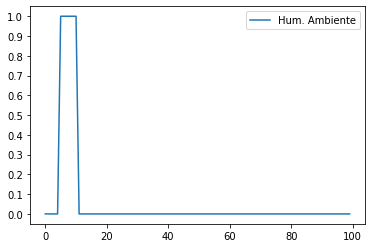

In [29]:
dibuja_aprima( (0,60,1), at_prima, 'Temp. Ambiente')
dibuja_aprima( (0,100,1), ah_prima, 'Hum. Ambiente')

# 9.DEFINICION Y EJECUCION RCI

Realizamos las funciones para simular la Regla Composicional de Inferencia (RCI), usando como entradas de la función los intervalos y conjuntos de tanto antecedentes como consecuentes, además de las a' de los antecedentes (pues el consecuente no posee a').

La función RCI es para el caso en el que la regla del modelo propuesto mencione a un solo antecedente y RCI_2 es el caso en el que ambos antecedentes influyen en el comportamiento del consecuente.

In [30]:
# Función para la Regla Composicional de Inferencia
def RCI(ant_intervalo, cons_intervalo, conjunto_ant, conjunto_cons, a_prima):
  # Comienza el cálculo de salida
  x_solucion = [] # Contendrá los valores del x de la solución 
  y_solucion = [] # Contendrá los valores del y de la solución
  # Bucle que recorre los valores de la variable de salida de 1 en 1
  for x in range(cons_intervalo[0], cons_intervalo[1], cons_intervalo[2]):
    l = [] # 
    for y in range(ant_intervalo[0], ant_intervalo[1], ant_intervalo[2]):
      l.append( T( mu_R(y,conjunto_ant,x,conjunto_cons), mu_trap(y,a_prima)) )
    x_solucion.append(x)
    y_solucion.append(max(l))
  return x_solucion, y_solucion

# Ejemplo de uso
x_r0, y_r0 = RCI((0,61,1), (0,101,1), t_baja, c_baja, at_prima)
# print('Valor discretrización: (',v,max(l),')')
print (x_r0, y_r0)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100] [0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [31]:
# Función para la Regla Composicional de Inferencia
def RCI_2(ant1_intervalo, ant2_intervalo, cons_intervalo, conjunto_ant1, conjunto_ant2, conjunto_cons, a1_prima, a2_prima):
  # Comienza el cálculo de salida
  x_solucion = [] # Contendrá los valores del consucuente 
  y_solucion = [] # Contendrá los valores del primer antecedente
  # Bucles anidados que recorren los valores de la variable de salida con inicio
  # en N_intervalo[0], final en N_intervalo[1] y paso N_intervalo[2]
  for x in range(cons_intervalo[0], cons_intervalo[1], cons_intervalo[2]):
    l = [] # Conjunto vacío en el que guardaremos los valores que necesitemos
    for y in range(ant1_intervalo[0], ant1_intervalo[1], ant1_intervalo[2]):
      for z in range(ant2_intervalo[0], ant2_intervalo[1], ant2_intervalo[2]):
        l.append( T2( mu_R2(y,conjunto_ant1, z,conjunto_ant2, x,conjunto_cons), mu_trap(y,a1_prima), mu_trap(z,a2_prima) ) )
    x_solucion.append(x)
    y_solucion.append(max(l))
  return x_solucion, y_solucion

# Ejemplo de uso
x_r00, y_r00 = RCI_2( (0,61,1), (0,101,1), (0,101,1), t_media, h_baja, c_media, at_prima, ah_prima )
# print('Valor discretrización: (',v,max(l),')')
print (x_r00, y_r00)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06666666666666667, 0.13333333333333333, 0.2, 0.26666666666666666, 0.3333333333333333, 0.4, 0.4666666666666667, 0.5333333333333333, 0.6, 0.6666666666666666, 0.7333333333333333, 0.8, 0.8666666666666667, 0.9333333333333333, 1, 1, 1, 1, 1, 1, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

Generamos un pequeño código para mostrar una parte de la salida de nuestro sistema. Solo mostramos esta parte aquí pues, si usamos las a' iniciales puestas como ejemplo, ya sabemos de antemano que parte del sistema va a reaccionar con mayor fuerza (ya que el sistema/modelo propuesto es relativamente sencillo).

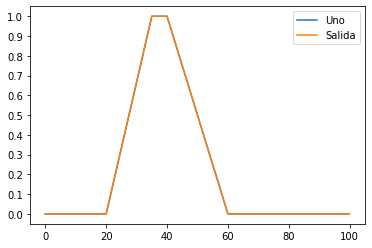

In [32]:
# Añade en la gráfica el conjunto difuso 'Uno'
x = np.arange(0, 100, 0.5)
y = [mu_trap(e,c_media) for e in x]
cd, = plt.plot(x,y)

# Añade en la gráfica el conjunto difuso 'Salida'
sol, = plt.plot(x_r00, y_r00)

# Coloca los valores del eje Y y leyendas
plt.yticks(np.arange(0,1.1,0.1))
plt.legend([cd, sol], ['Uno', 'Salida'], loc='best')

# Muestra la gráfica
plt.show()

### APLICACION DE LA RCI A CADA REGLA DEL MODELO

Reglas:

- IF Temperatura es Baja THEN Consumo es Bajo
- IF Temperatura es Media AND Humedad es Baja THEN Consumo es Medio
- IF Temperatura es Media AND Humedad es Media THEN Consumo es Medio
- IF Temperatura es Media AND Humedad es Alta THEN Consumo es Alto
- IF Temperatura es Alta THEN Consumo es Alto

Llamamos a las nuevas funciones, siguiendo las indicaciones de las reglas de nuestro modelo, mostradas nuevamente arriba, y guardamos los valores.

In [33]:
x_r1, y_r1 = RCI( (0,61,1), (0,101,1), t_baja, c_baja, at_prima )
x_r2, y_r2 = RCI_2( (0,61,1), (0,101,1), (0,101,1), t_media, h_baja, c_media, at_prima, ah_prima )  
x_r3, y_r3 = RCI_2( (0,61,1), (0,101,1), (0,101,1), t_media, h_media, c_media, at_prima, ah_prima )
x_r4, y_r4 = RCI_2( (0,61,1), (0,101,1), (0,101,1), t_media, h_alta, c_alta, at_prima, ah_prima )
x_r5, y_r5 = RCI( (0,61,1), (0,101,1), t_alta, c_alta, at_prima )

# 10.Representación de Entradas y Salidas para cada regla

Seguidamente, creamos otro par de funciones (se realizan tantas funciones porque de esta forma es más fácil llamarlas y usarlas posteriormente) que muestren las entradas (a') con sus respectivos antecedentes cada una y la sálida, con su nivel de reacción a la mismas. Luego se llama tantas veces como reglas tenga el modelo, pues la función está hecha de esta manera.

Esto nos permite ver mejor la fuerza de cada regla para las entradas establecidas. En nuestro caso se llamara 5 veces, pues nuestro sistema tiene 5 reglas.

In [34]:
def muestraEntrada(dominio_ant,ant,A_prima, eti_ant, eti_a_prima):
  # Añade conjunto difuso 'Media' a la gráfica
  x = np.arange(dominio_ant[0], dominio_ant[1], dominio_ant[2])
  y = [mu_trap(e,ant) for e in x]
  Media, = plt.plot(x,y)
  # Añade conjunto difuso 'ambiente' a la gráfica
  y = [mu_trap(e,A_prima) for e in x]
  ambiente, = plt.plot(x,y)
  # Coloca los valores del eje Y y leyendas 
  plt.yticks(np.arange(0,1.1,0.1))
  plt.legend([Media, ambiente], [eti_ant, eti_a_prima], loc='best')
  # Muestra la gráfica
  plt.show()

def muestraSalida(dominio_cons,cons,eti_cons, x_solucion, y_solucion):
  # Añade en la gráfica el conjunto difuso de salida del consecuente
  x = np.arange(dominio_cons[0], dominio_cons[1], dominio_cons[2])
  y = [mu_trap(e,(cons[0], cons[1], cons[2], cons[3])) for e in x]
  cd, = plt.plot(x,y)
  # Añade en la gráfica el conjunto difuso 'Salida'
  sol, = plt.plot(x_solucion, y_solucion)
  # Coloca los valores del eje Y y leyendas
  plt.yticks(np.arange(0,1.1,0.1))
  plt.legend([cd, sol], [eti_cons, 'Salida'], loc='best')
  # Muestra la gráfica
  plt.show()

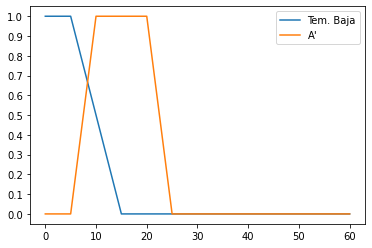

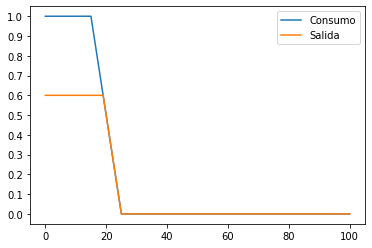

In [35]:
muestraEntrada( (0,61,1),t_baja,at_prima, 'Tem. Baja', "A'")
muestraSalida( (0,101,1), c_baja, 'Consumo', x_r1,y_r1 )

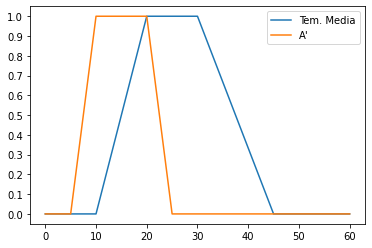

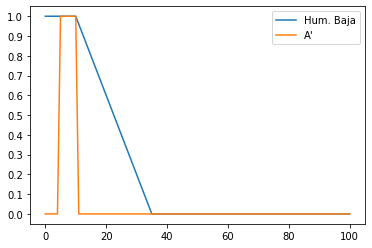

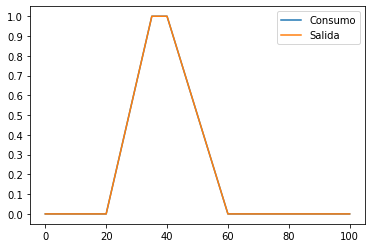

In [36]:
muestraEntrada( (0,61,1),t_media,at_prima, 'Tem. Media', "A'")
muestraEntrada( (0,101,1),h_baja,ah_prima, 'Hum. Baja', "A'")
muestraSalida( (0,101,1), c_media, 'Consumo', x_r2,y_r2 )

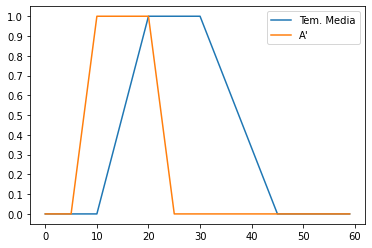

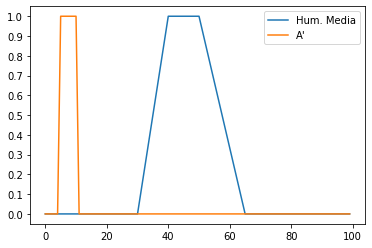

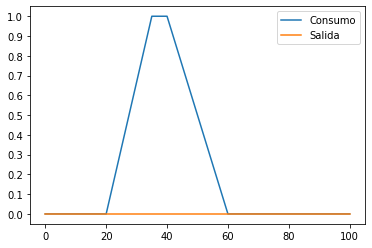

In [37]:
muestraEntrada( (0,60,1),t_media,at_prima, 'Tem. Media', "A'")
muestraEntrada( (0,100,1),h_media,ah_prima, 'Hum. Media', "A'")
muestraSalida( (0,101,1), c_media, 'Consumo', x_r3,y_r3 )

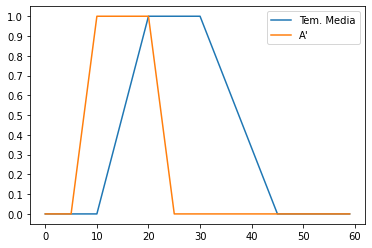

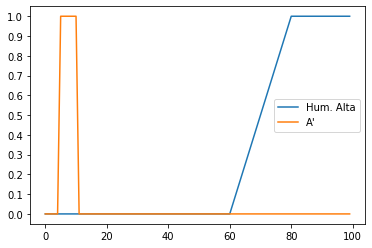

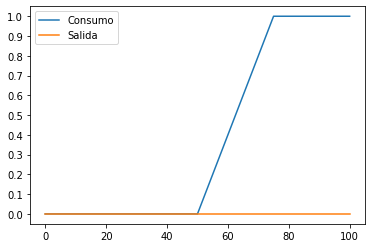

In [38]:
muestraEntrada( (0,60,1),t_media,at_prima, 'Tem. Media', "A'")
muestraEntrada( (0,100,1),h_alta,ah_prima, 'Hum. Alta', "A'")
muestraSalida( (0,101,1), c_alta, 'Consumo', x_r4,y_r4 )

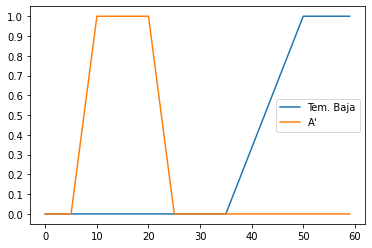

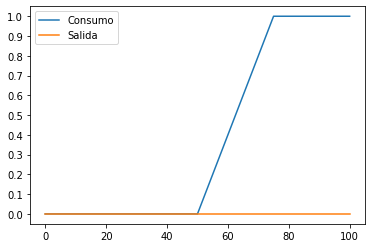

In [39]:
muestraEntrada( (0,60,1),t_alta,at_prima, 'Tem. Baja', "A'")
muestraSalida( (0,101,1), c_alta, 'Consumo', x_r5,y_r5 )

# 11.Función para defuzzificar y muestra gráfica de salida

Entramos ahora en la fase final del programa. En este apartado mostraremos el conjunto de salida (consecuente) con la salida creada por nuestras entradas, que se mostrará en este caso de forma completa (en vez de por partes) justo debajo del conjunto ya mencionado.

Los números arriba de las gráficas son los valores numéricos de nuestra salida, mostrados como un vector horizontal.

[0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.5, 0.4, 0.3, 0.2, 0.26666666666666666, 0.3333333333333333, 0.4, 0.4666666666666667, 0.5333333333333333, 0.6, 0.6666666666666666, 0.7333333333333333, 0.8, 0.8666666666666667, 0.9333333333333333, 1, 1, 1, 1, 1, 1, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


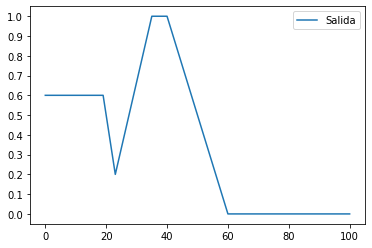

In [40]:
# Creamos vector con el máximo de cada salida para cada punto
y_final = []
for i in range(0,101,1):
  y_final.append( max(y_r1[i],y_r2[i],y_r3[i],y_r4[i],y_r5[i]) )

print (y_final)



def salida_total():
  sol, = plt.plot(x_r00, y_final)
  # Coloca los valores del eje Y y leyendas
  plt.yticks(np.arange(0,1.1,0.1))
  plt.legend([sol], ['Salida'], loc='best')
  plt.yticks(np.arange(0,1.1,0.1))
  # Muestra la gráfica
  plt.show()

salida_total()

A continuación programamos un sitema de deffuzificación, que a partir de la salida que hemos generado busque el que se podría considerar el centro de masas.

Se podría haber elegido otros puntos de interés pero se ha optado por este debido a la facilidad presente para el mismo.

In [41]:
def defuzzificacion(X, Y):
  r = 0.0
  for x,mu_x in zip(X,Y):
    r += x*mu_x
  if sum(Y)!=0.0:
    return True, r/sum(Y)
  return False,'NaN'

x = (0,1,2,3,4,5,6)
y = (0.0,0.0,0.0,0,0.5,0.0,0.0)
defuzzificacion(x,y)

(True, 4.0)

Finalmente se hace una función para el mismo propósito, pero mostrando los resultados de manera gráfica para mejor visualización y entendimiento.

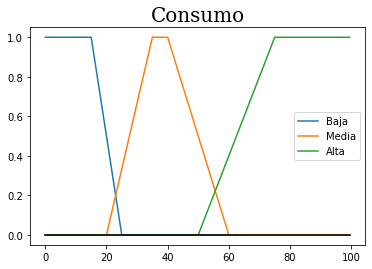

True 28.5586854460094


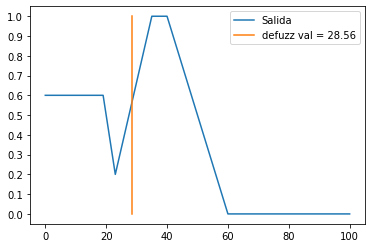

In [42]:
def muestraSalidayDefuzz(x, y):
  dibuja_conjuntos( (0,100,0.5), (c_baja,c_media,c_alta), ['Baja', 'Media', 'Alta'], 'Consumo')
  # Añade conjunto difuso de salida
  Salida, = plt.plot(x,y)
  # Añade conjunto difuso 'ambiente' a la gráfica
  activa, v = defuzzificacion(x,y)
  print(activa,v)
  if activa:
    ambiente, = plt.plot([v,v],[0,1]) 
    # Coloca los valores del eje Y y leyendas 
    plt.legend([Salida, ambiente], ['Salida', 'defuzz val = ' + str( round(v,2) ) ], loc='best')
  plt.yticks(np.arange(0,1.1,0.1))
  # Muestra la gráfica
  plt.show()

muestraSalidayDefuzz(x_r00,y_final)

Valores de interés:
1: at_prima=[1,4,4,7]      ah_prima=[70,80,80,90]
2: at_prima=[20,25,25,30]  ah_prima=[5,15,15,25]
3: at_prima=[20,25,25,30]  ah_prima=[40,45,45,60]
4: at_prima=[20,25,25,30]  ah_prima=[70,80,80,90]
5: at_prima=[50,55,55,60]  ah_prima=[5,15,15,25]
6: Valores Personalizados
Introduzca opción deseada:  1
Conjuntos del sistema.


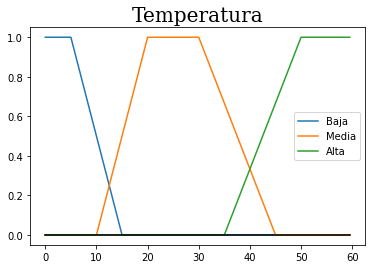

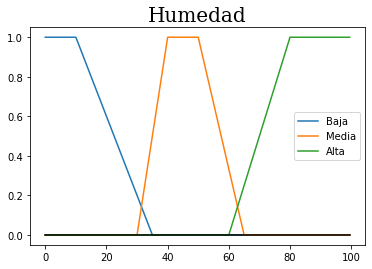

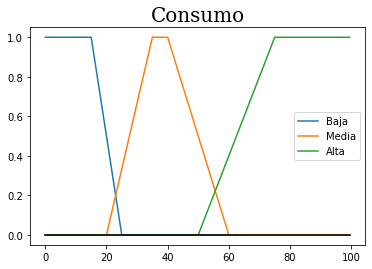

---
---
Gráfica de las a prima (A') introducidas.


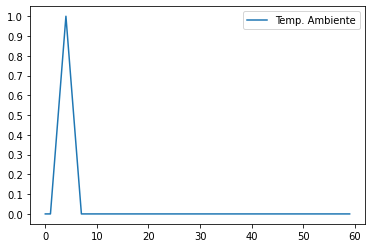

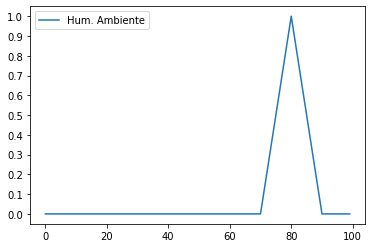

---
---
Activación de la primera regla del sistema.


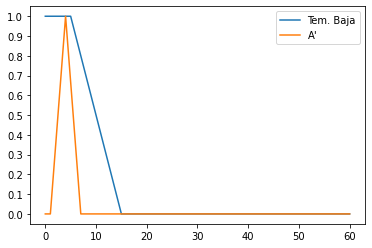

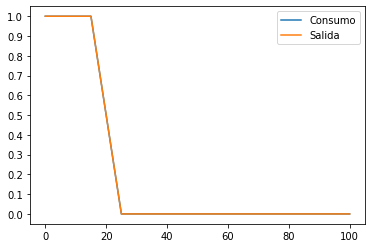

***
Activación de la segunda regla del sistema.


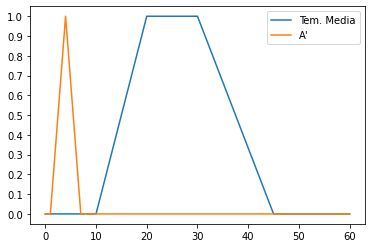

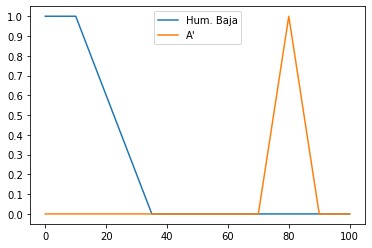

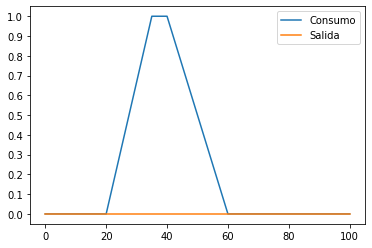

***
Activación de la tercera regla del sistema.


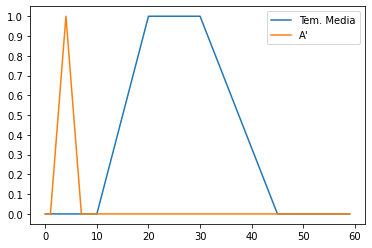

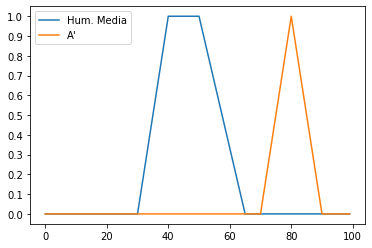

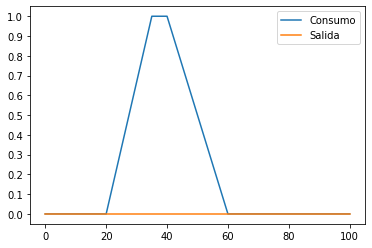

***
Activación de la cuarta regla del sistema.


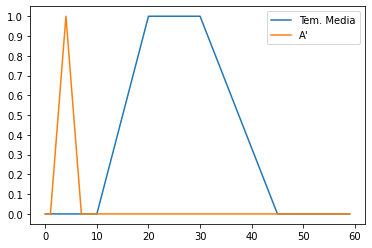

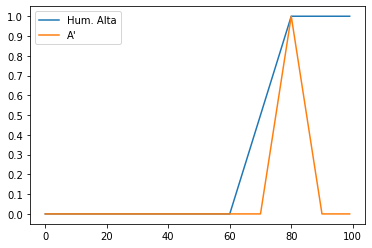

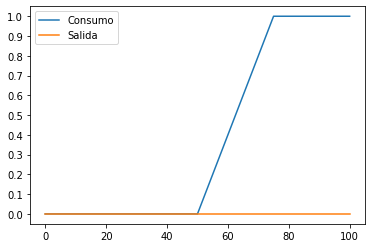

***
Activación de la quinta regla del sistema.


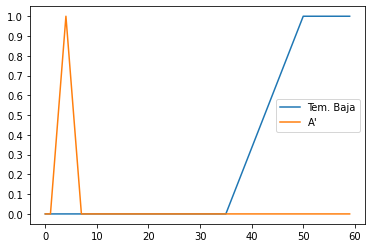

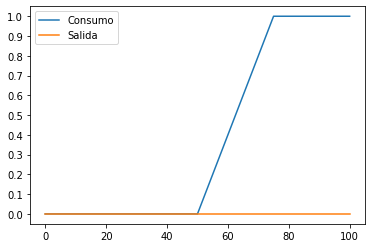

---
---
Conjunto de salida y salida deffuzificada, con 'centro'de la misma.


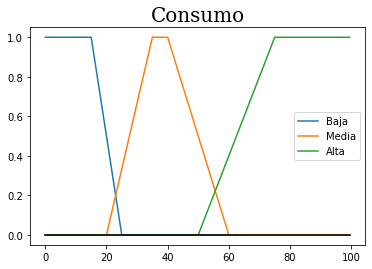

True 9.951219512195122


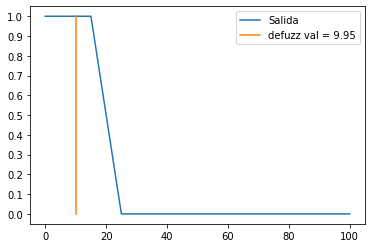

---
---
Para salir introduzca 0: 0


In [43]:
# Finalmente, creamos un bucle para poder probar entradas distintas.
# La primera vex irá directamente al proceso, en las siguientes iteraciones
# nos indicará cómo salir del bucle, en caso de que queramos parar el proceso,
# si introducimos algo que no sea lo especificado, volveremos a entrar en el
# proceso de nuevo, pudiendo así ver las gráficas para distintas variables.
# Además, se han introducido algunos valores de muestra en los que se ven la
# clara activación de cada una de las reglas de nuestro sistema para facilidad
# tanto visual como para proporcionar ejemplos de cómo va a funcionar nuestro
# sistema y que así el usuario pueda crear sus propias entradas de una forma
# más razanoble, en vex de probar sin idea de cómo será la salida. 

def program():
  first= 1
  while True:
    ah_prima= [0,0,0,0]
    at_prima= [0,0,0,0]
    if (first== 0):
      print("---")
      print("---")
      choice = int( input( "Para salir introduzca 0: ") )
      if choice== 0:
        break
    first= 0
    print("Valores de interés:")
    print("1: at_prima=[1,4,4,7]      ah_prima=[70,80,80,90]")
    print("2: at_prima=[20,25,25,30]  ah_prima=[5,15,15,25]")
    print("3: at_prima=[20,25,25,30]  ah_prima=[40,45,45,60]")
    print("4: at_prima=[20,25,25,30]  ah_prima=[70,80,80,90]")
    print("5: at_prima=[50,55,55,60]  ah_prima=[5,15,15,25]")
    print("6: Valores Personalizados")
    choice2= 0
    while (choice2 < 1) or (choice2 > 6):
      choice2 = int( input( "Introduzca opción deseada:  ") )
    first= 0
    if choice2== 1:
      at_prima=[1,4,4,7]
      ah_prima=[70,80,80,90]
    elif choice2== 2:
      at_prima=[20,25,25,30]
      ah_prima=[5,15,15,25]
    elif choice2== 3:
      at_prima=[20,25,25,30]
      ah_prima=[40,45,45,60]
    elif choice2== 4:
      at_prima=[20,25,25,30]
      ah_prima=[70,80,80,90]
    elif choice2== 5:
      at_prima=[50,55,55,60]
      ah_prima=[5,15,15,25]
    elif choice2== 6:
      at_prima, ah_prima= entradas(60,100)
    print("Conjuntos del sistema.")
    dibuja_conjuntos( (0,60,0.5), (t_baja,t_media,t_alta), ['Baja', 'Media', 'Alta'], 'Temperatura')
    dibuja_conjuntos( (0,100,0.5), (h_baja,h_media,h_alta), ['Baja', 'Media', 'Alta'], 'Humedad')
    dibuja_conjuntos( (0,100,0.5), (c_baja,c_media,c_alta), ['Baja', 'Media', 'Alta'], 'Consumo')
    print("---")
    print("---")
    print("Gráfica de las a prima (A') introducidas.")
    dibuja_aprima( (0,60,1), at_prima, 'Temp. Ambiente')
    dibuja_aprima( (0,100,1), ah_prima, 'Hum. Ambiente')
    # Calculo del nivel de activación de las reglas del sistema
    x_r1, y_r1 = RCI( (0,61,1), (0,101,1), t_baja, c_baja, at_prima )
    x_r2, y_r2 = RCI_2( (0,61,1), (0,101,1), (0,101,1), t_media, h_baja, c_media, at_prima, ah_prima )  
    x_r3, y_r3 = RCI_2( (0,61,1), (0,101,1), (0,101,1), t_media, h_media, c_media, at_prima, ah_prima )
    x_r4, y_r4 = RCI_2( (0,61,1), (0,101,1), (0,101,1), t_media, h_alta, c_alta, at_prima, ah_prima )
    x_r5, y_r5 = RCI( (0,61,1), (0,101,1), t_alta, c_alta, at_prima )
    print("---")
    print("---")
    print("Activación de la primera regla del sistema.")
    muestraEntrada( (0,61,1),t_baja,at_prima, 'Tem. Baja', "A'")
    muestraSalida( (0,101,1), c_baja, 'Consumo', x_r1,y_r1 )
    print("***")
    print("Activación de la segunda regla del sistema.")
    muestraEntrada( (0,61,1),t_media,at_prima, 'Tem. Media', "A'")
    muestraEntrada( (0,101,1),h_baja,ah_prima, 'Hum. Baja', "A'")
    muestraSalida( (0,101,1), c_media, 'Consumo', x_r2,y_r2 )
    print("***")
    print("Activación de la tercera regla del sistema.")
    muestraEntrada( (0,60,1),t_media,at_prima, 'Tem. Media', "A'")
    muestraEntrada( (0,100,1),h_media,ah_prima, 'Hum. Media', "A'")
    muestraSalida( (0,101,1), c_media, 'Consumo', x_r3,y_r3 )
    print("***")
    print("Activación de la cuarta regla del sistema.")
    muestraEntrada( (0,60,1),t_media,at_prima, 'Tem. Media', "A'")
    muestraEntrada( (0,100,1),h_alta,ah_prima, 'Hum. Alta', "A'")
    muestraSalida( (0,101,1), c_alta, 'Consumo', x_r4,y_r4 )
    print("***")
    print("Activación de la quinta regla del sistema.")
    muestraEntrada( (0,60,1),t_alta,at_prima, 'Tem. Baja', "A'")
    muestraSalida( (0,101,1), c_alta, 'Consumo', x_r5,y_r5 )
    print("---")
    print("---")
    print("Conjunto de salida y salida deffuzificada, con 'centro'de la misma.")
    y_final = []
    for i in range(0,101,1):
      y_final.append( max(y_r1[i],y_r2[i],y_r3[i],y_r4[i],y_r5[i]) )
    salida_total
    muestraSalidayDefuzz(x_r00,y_final)

program()